# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
folder_path = r"C:\Users\ASUS VIVOBOOK\Downloads\drive-download-20240430T163238Z-001"

# Mengecek ada file apa saja di `folder_path`
os.listdir(folder_path)

['2015.csv',
 '2016.csv',
 '2017.csv',
 '2018.csv',
 '2019.csv',
 '2020.csv',
 '2021.csv',
 '2022.csv']

In [4]:
# Mendefinisikan path ke folder tempat file CSV disimpan
path_file_2019 = os.path.join(folder_path, '2019.csv')

# Membaca file CSV dan menyimpan isi ke dalam DataFrame sesuai dengan value `path_file_2019`
df_2019 = pd.read_csv(path_file_2019)

In [5]:
df_2019.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


# Missing Value

In [6]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


# Statistik Deskriptif dari Data

In [7]:
print(df_2019.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

# Distribusi Variabel

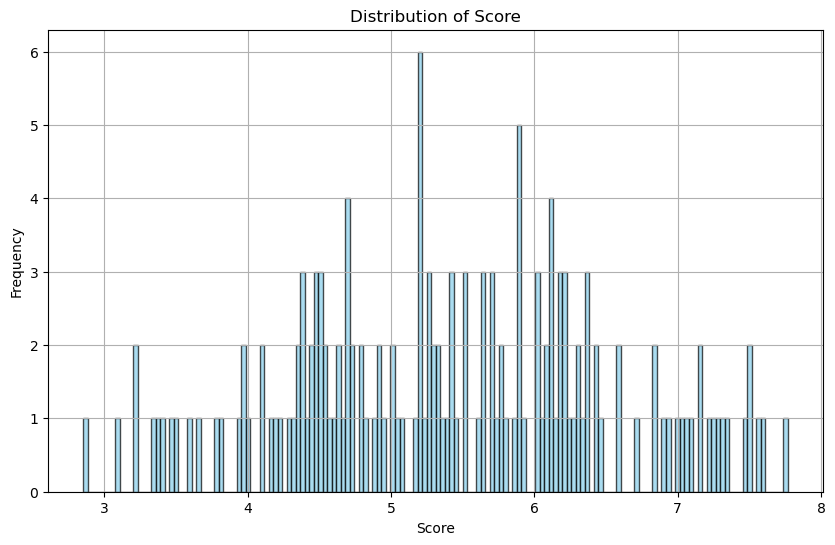

In [8]:
# Membuat histogram dari kolom 'Score'
plt.figure(figsize=(10, 6))
plt.hist(df_2019['Score'], bins=156, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

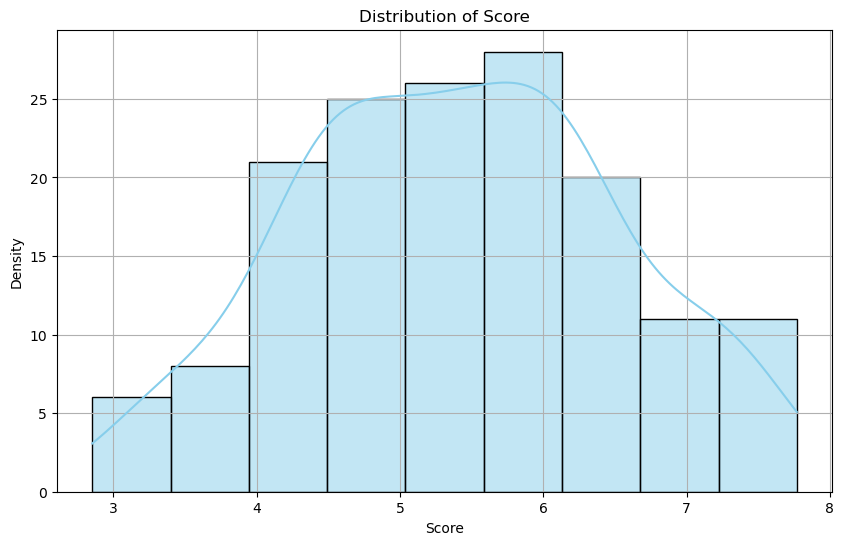

In [10]:
import seaborn as sns

# Membuat density plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_2019['Score'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Korelasi Antara Variabel

In [9]:
# Mengambil hanya kolom numerik
numeric_df_2019 = df_2019.select_dtypes(include='number')

# Menghitung korelasi antara variabel numerik dalam DataFrame
correlation_matrix = numeric_df_2019.corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

                              Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.989096       -0.801947   
Score                            -0.989096  1.000000        0.793883   
GDP per capita                   -0.801947  0.793883        1.000000   
Social support                   -0.767465  0.777058        0.754906   
Healthy life expectancy          -0.787411  0.779883        0.835462   
Freedom to make life choices     -0.546606  0.566742        0.379079   
Generosity                       -0.047993  0.075824       -0.079662   
Perceptions of corruption        -0.351959  0.385613        0.298920   

                              Social support  Healthy life expectancy  \
Overall rank                       -0.767465                -0.787411   
Score                               0.777058                 0.779883   
GDP per capita                      0.754906                 0.835462   
Social support                      1.000000               

# Perbandingan Antara Grup

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_14632\3521158739.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Score', y='Country or region', data=df_2019, estimator=lambda x: sum(x) / len(x), ci=None)


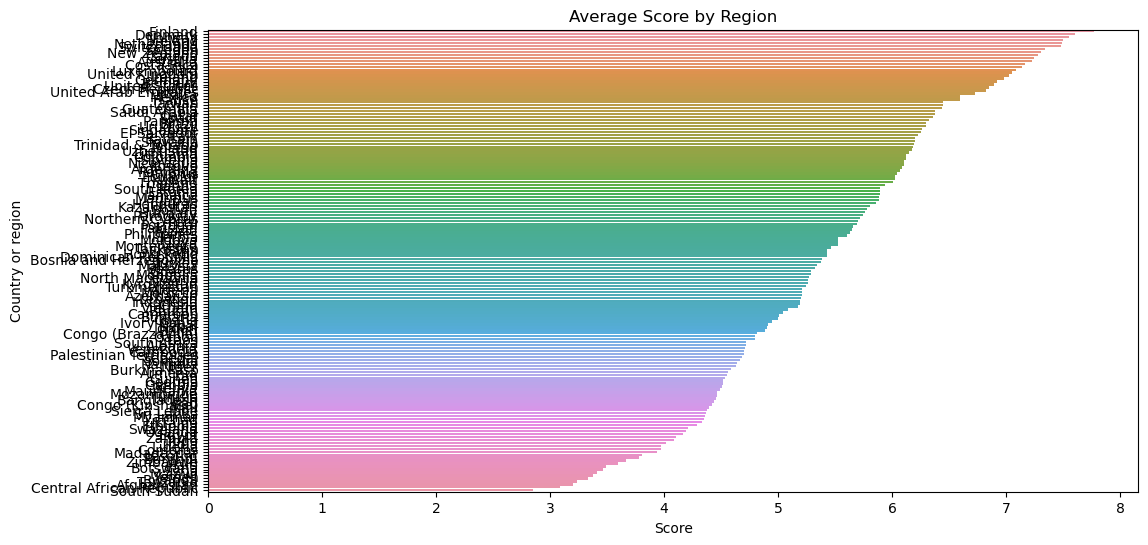

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat bar plot dari rata-rata 'Score' berdasarkan grup 'Region'
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Country or region', data=df_2019, estimator=lambda x: sum(x) / len(x), ci=None)
plt.title('Average Score by Region')
plt.xlabel('Score')
plt.ylabel('Country or region')
plt.show()

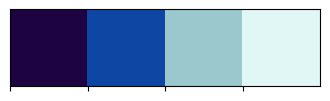

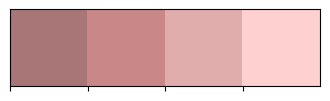

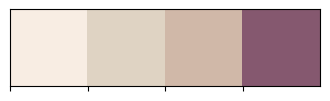

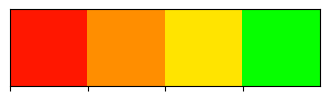

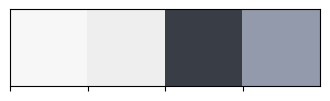

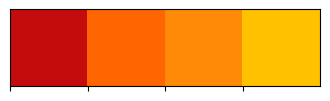

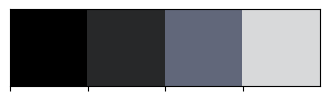

In [15]:
# Membuat Color pallete untuk mempercantik tampilan
colors_blue = ["#1E0342", "#0E46A3", '#9AC8CD', '#E1F7F5']
colors_pink = ["#A87676", "#CA8787", '#E1ACAC', '#FFD0D0']
colors_pastel = ["#F8EDE3", "#DFD3C3", '#D0B8A8', '#85586F']
colors_neon = ["#FF1700", '#FF8E00', '#FFE400', '#06FF00']
colors_monokrom = ["#F7F7F7", '#EEEEEE', '#393E46', '#929AAB']
colors_red = ["#C40C0C", '#FF6500', '#FF8A08', '#FFC100']
colors_black = ["#000000",'#272829', '#61677A', '#D8D9DA']

sns.palplot(colors_blue)
sns.palplot(colors_pink)
sns.palplot(colors_pastel)
sns.palplot(colors_neon)
sns.palplot(colors_monokrom)
sns.palplot(colors_red)
sns.palplot(colors_black)

# Melihat Posisi Indonesia

In [17]:
## Indonesia Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='Indonesia']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
91,92,Indonesia,5.192,0.931,1.203,0.66,0.491,0.498,0.028


Indonesia berada di peringkat 92 pada data skor kebahagiaan di tahun 2019, selanjutnya kita akan melihat peringkat 9 negara lain selain Indonesia yang memiliki penduduk terbanyak di dunia. Apakah semakin banyak penduduk maka semakin bahagia? atau sebaliknya?

# Melihat Posisi 9 Negara Lain dengan Penduduk Terbanyak

Menurut databooks (https://databoks.katadata.co.id/datapublish/2024/01/25/ini-10-negara-dengan-jumlah-penduduk-terbanyak-di-dunia-awal-2024) dan GoodStats (https://goodstats.id/article/10-negara-dengan-jumlah-penduduk-terbesar-2024-indonesia-nomor-berapa-Wpch3), 10 negara dengan penduduk terbanyak di dunia adalah :
1. India
2. China
3. Amerika Serikat
4. Indonesia
5. Pakistan
6. Nigeria
7. Brazil
8. Bangladesh
9. Rusia
10. Meksiko

In [18]:
## India Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='India']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,140,India,4.015,0.755,0.765,0.588,0.498,0.2,0.085


In [19]:
## China Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='China']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
92,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.1


In [20]:
## AS Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='United States']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128


In [21]:
## Pakistan Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='Pakistan']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
66,67,Pakistan,5.653,0.677,0.886,0.535,0.313,0.22,0.098


In [22]:
## Nigeria Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='Nigeria']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
84,85,Nigeria,5.265,0.696,1.111,0.245,0.426,0.215,0.041


In [23]:
## Brasil Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='Brazil']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
31,32,Brazil,6.3,1.004,1.439,0.802,0.39,0.099,0.086


In [24]:
## Bangladesh Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='Bangladesh']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
124,125,Bangladesh,4.456,0.562,0.928,0.723,0.527,0.166,0.143


In [25]:
## Rusia Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='Russia']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
67,68,Russia,5.648,1.183,1.452,0.726,0.334,0.082,0.031


In [26]:
## Meksiko Ranking Berapa?
df_2019.loc[df_2019["Country or region"]=='Mexico']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
22,23,Mexico,6.595,1.07,1.323,0.861,0.433,0.074,0.073


In [27]:
## dibandingkan dengan 9 Negara dengan penduduk terbanyak, Indonesia di posisi keberapa?
mostpopulated_country =  ["India", "China", "United States", "Indonesia", "Pakistan", "Nigeria", "Brazil", "Bangladesh", "Russia", "Mexico"]

df_2019.loc[df_2019["Country or region"].isin(mostpopulated_country)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
31,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086
66,67,Pakistan,5.653,0.677,0.886,0.535,0.313,0.220,0.098
67,68,Russia,5.648,1.183,1.452,0.726,0.334,0.082,0.031
84,85,Nigeria,5.265,0.696,1.111,0.245,0.426,0.215,0.041
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
92,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.100
124,125,Bangladesh,4.456,0.562,0.928,0.723,0.527,0.166,0.143
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085


Ternyata dengan semakin banyaknya penduduk di suatu negara tidak menjadikan negara tersebut semakin bahagia

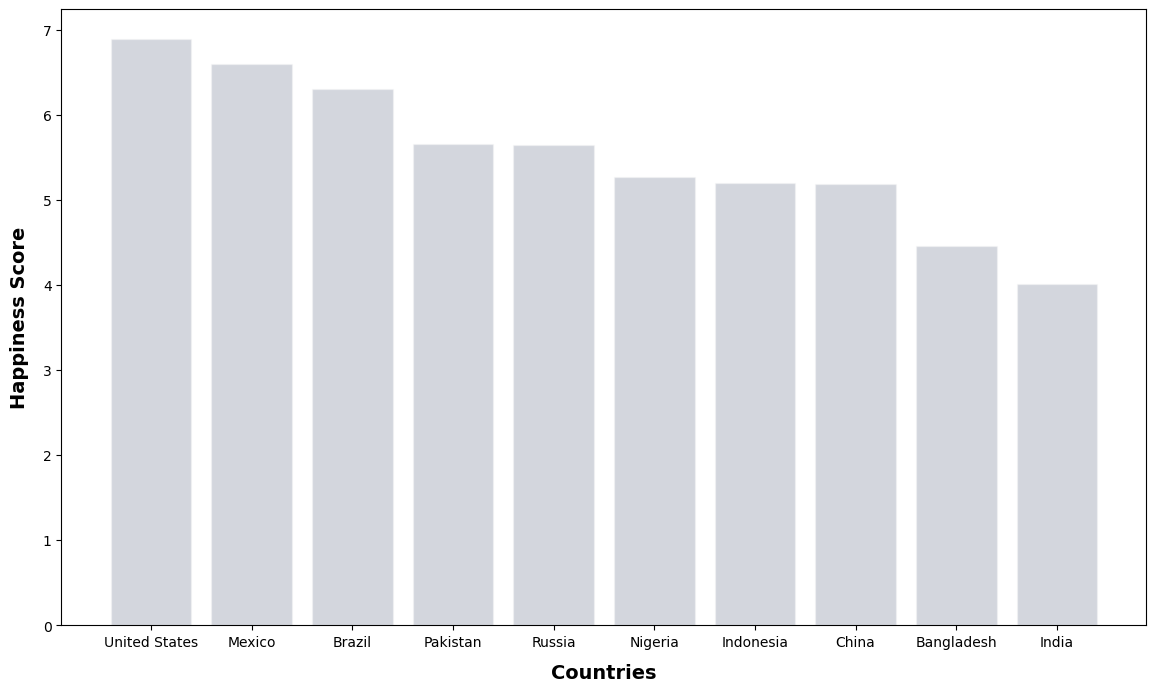

In [28]:
# Memfilter DataFrame df_2019 untuk hanya memasukkan data dari 10 negara dengan penduduk terbanyak
df = df_2019[df_2019['Country or region'].isin(mostpopulated_country)]

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap 10 negara dengan penduduk terbanyak
bars1 = ax.bar(df['Country or region'], df['Score'], color=colors_monokrom[3], alpha=0.4, edgecolor=colors_monokrom[0])

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_black[0])

# Mengatur label sumbu y
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_black[0])

# Menampilkan plot
plt.show()

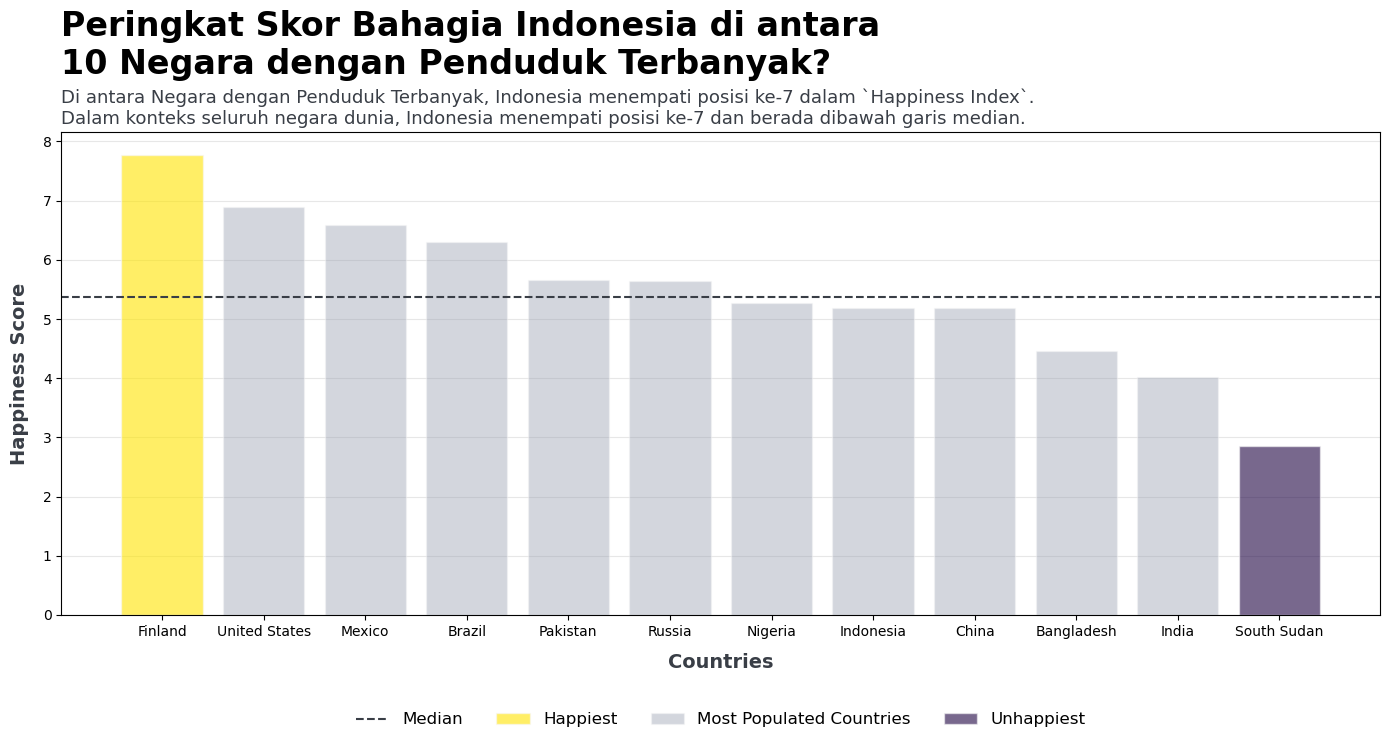

In [32]:
# Filter DataFrame df_2019 untuk hanya menyertakan 10 negara dengan penduduk terbanyak
df = df_2019[df_2019['Country or region'].isin(mostpopulated_country)]

# Mengambil baris pertama dari df_2019 yang mungkin merepresentasikan negara dengan skor kebahagiaan tertinggi
df_2019_top = df_2019.iloc[0:1]

# Mengambil baris terakhir dari df_2019 yang mungkin merepresentasikan negara dengan skor kebahagiaan terendah
df_2019_bot = df_2019.iloc[-1]

# Menghitung skor kebahagiaan median dari df_2019
median_score = df_2019['Score'].median()

# Membuat figur dan sumbu untuk plot dengan ukuran tertentu
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk negara dengan skor kebahagiaan tertinggi
bars0 = ax.bar(df_2019_top['Country or region'], df_2019_top['Score'], color=colors_neon[2], alpha=0.6, edgecolor=colors_monokrom[0])

# Membuat grafik bar untuk 10 negara dengan penduduk terbanyak
bars1 = ax.bar(df['Country or region'], df['Score'], color=colors_monokrom[3], alpha=0.4, edgecolor=colors_monokrom[0])

# Membuat grafik bar untuk negara dengan skor kebahagiaan terendah
bars2 = ax.bar(df_2019_bot['Country or region'], df_2019_bot['Score'], color=colors_blue[0], alpha=0.6, edgecolor=colors_monokrom[0])

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_monokrom[2])

# Menambahkan legenda untuk grafik
ax.legend(["Median", "Happiest", "Most Populated Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, borderpad=1, frameon=False, fontsize=12)

# Menambahkan grid pada sumbu y dan mengatur agar grid berada di belakang bar
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Mengatur label dan gaya untuk sumbu x dan y
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_monokrom[2])
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_monokrom[2])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks pada grafik untuk memberikan konteks atau informasi tambahan
plt.text(s="Peringkat Skor Bahagia Indonesia di antara \n10 Negara dengan Penduduk Terbanyak?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_black[0])

# Mendefinisikan variabel rank_indo dengan nilai 7
rank_indo = 7

# Menambahkan judul dengan informasi posisi Indonesia dalam konteks penduduk terbanyak dan global
plt.title(f"Di antara Negara dengan Penduduk Terbanyak, Indonesia menempati posisi ke-7 dalam `Happiness Index`.\nDalam konteks seluruh negara dunia, Indonesia menempati posisi ke-{rank_indo} dan berada dibawah garis median.", loc='left', fontsize=13, color=colors_monokrom[2])

# Mengatur layout agar tidak ada elemen yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

mari kita jelaskan setiap parameter dari metode `ax.legend()` dalam kode tersebut:

1. **Label Legenda (`["Median", "Happiest", "Most Populated Countries", "Unhappiest"]`):**
   - Ini adalah daftar label yang akan ditampilkan di legenda. Masing-masing label berhubungan dengan elemen plot yang berbeda (dalam kasus ini, garis median, bar negara paling bahagia, bar negara-negara dengan penduduk terbanyak, dan bar negara paling tidak bahagia).

2. **`loc='upper center'`:**
   - Parameter `loc` menentukan lokasi legenda. Nilai `'upper center'` berarti legenda akan ditempatkan di bagian atas tengah dari plot.

3. **`bbox_to_anchor=(0.5, -0.2)`:**
   - `bbox_to_anchor` digunakan untuk menempatkan legenda secara relatif terhadap seluruh area plot, bukan hanya area dengan axes. Koordinat (0.5, -0.2) berarti legenda akan berada di tengah secara horizontal (0.5) dan sedikit di bawah plot (karena nilai y adalah negatif).

4. **`ncol=5`:**
   - `ncol` menentukan jumlah kolom dalam legenda. Nilai `5` berarti semua label akan diatur dalam 5 kolom. Jika jumlah label kurang dari jumlah kolom, akan diatur sesuai dengan jumlah label.

5. **`borderpad=1`:**
   - `borderpad` adalah padding (ruang tambahan) di dalam border legenda. Nilainya dalam poin. Nilai `1` memberikan padding yang cukup untuk menjaga teks dan border legenda tidak terlalu dekat.

6. **`frameon=False`:**
   - `frameon` menentukan apakah legenda memiliki bingkai atau tidak. `False` berarti tidak ada bingkai di sekitar legenda.

7. **`fontsize=12`:**
   - `fontsize` menentukan ukuran font dari teks di dalam legenda. Nilai `12` menetapkan ukuran font ke 12 poin.

Parameter-parameter ini dikombinasikan untuk mengontrol posisi, tata letak, dan tampilan legenda pada plot matplotlib.

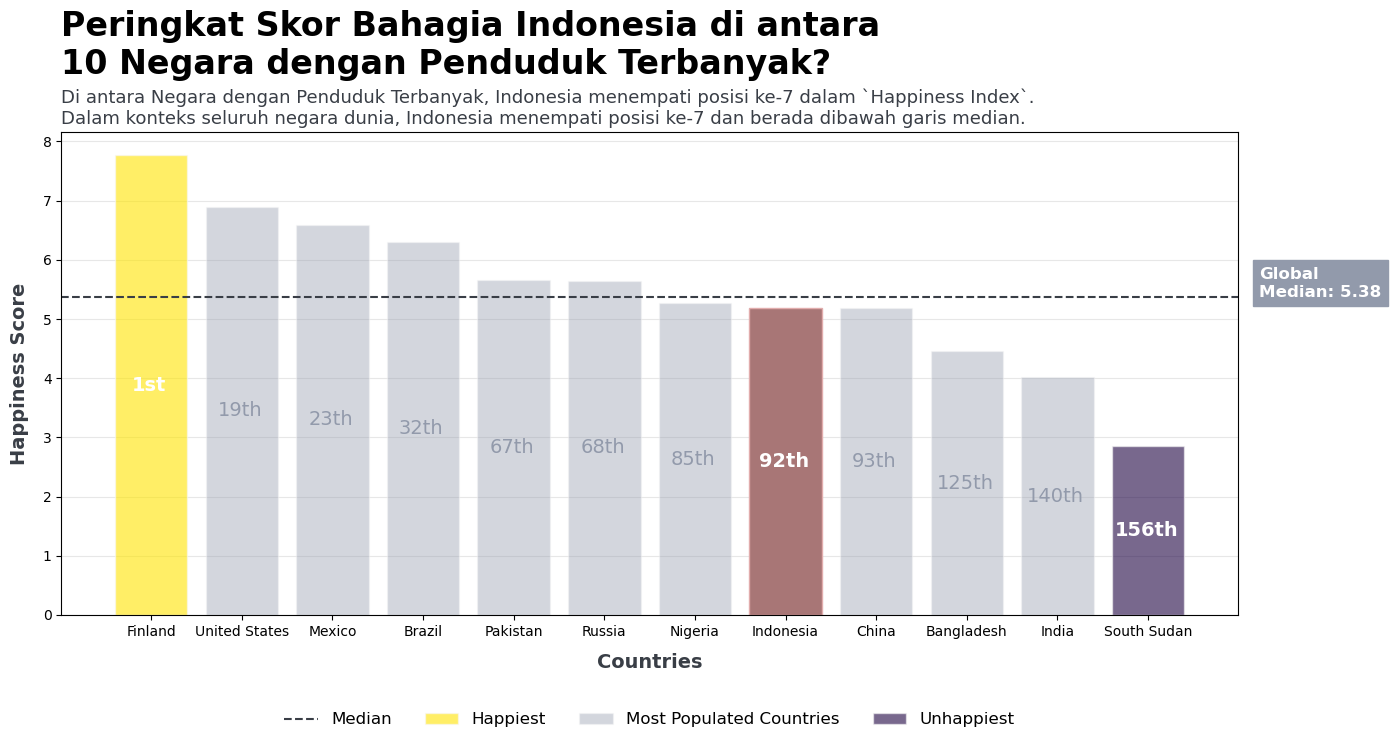

In [33]:
# Filter DataFrame df_2019 untuk hanya menyertakan negara-negara ASEAN
df = df_2019[df_2019['Country or region'].isin(mostpopulated_country)]

# Mengambil baris pertama dari df_2019 yang mungkin merepresentasikan negara dengan skor kebahagiaan tertinggi
df_2019_top = df_2019.iloc[0:1]

# Mengambil baris terakhir dari df_2019 yang mungkin merepresentasikan negara dengan skor kebahagiaan terendah
df_2019_bot = df_2019.iloc[-1]

# Menghitung skor kebahagiaan median dari df_2019
median_score = df_2019['Score'].median()

# Membuat figur dan sumbu untuk plot dengan ukuran tertentu
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk negara dengan skor kebahagiaan tertinggi
bars0 = ax.bar(df_2019_top['Country or region'], df_2019_top['Score'], color=colors_neon[2], alpha=0.6, edgecolor=colors_monokrom[0])

# Membuat grafik bar untuk 10 negara dengan penduduk terbanyak
bars1 = ax.bar(df['Country or region'], df['Score'], color=colors_monokrom[3], alpha=0.4, edgecolor=colors_monokrom[0])

# Membuat grafik bar untuk negara dengan skor kebahagiaan terendah
bars2 = ax.bar(df_2019_bot['Country or region'], df_2019_bot['Score'], color=colors_blue[0], alpha=0.6, edgecolor=colors_monokrom[0])

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_monokrom[2])

# Menambahkan legenda untuk grafik
ax.legend(["Median", "Happiest", "Most Populated Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, borderpad=1, frameon=False, fontsize=12)

# Menambahkan grid pada sumbu y dan mengatur agar grid berada di belakang bar
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Mengatur label dan gaya untuk sumbu x dan y
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_monokrom[2])
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_monokrom[2])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Mendapatkan indeks dari 10 negara dengan penduduk terbanyak dalam DataFrame dan menyesuaikannya dengan +1
sea_idx = list(df.index + 1)

# Menambahkan teks untuk menunjukkan skor median kebahagiaan global pada plot
avgl = ax.text(
    s="Global\nMedian: {:.2f}".format(median_score),  # Teks yang menampilkan skor median global dengan dua desimal
    x=xmax*1.02,  # Mengatur posisi teks di sumbu x, sedikit di luar batas maksimum x dari plot
    y=median_score,  # Mengatur posisi teks di sumbu y sesuai dengan nilai median_score
    backgroundcolor=colors_monokrom[3],  # Warna latar belakang teks
    fontsize=12,  # Ukuran font teks
    fontweight='bold',  # Membuat font tebal
    color='white'  # Warna teks
)

## Mengatur bar khusus (dalam kasus ini untuk Indonesia) di dalam bars1
# Meningkatkan opaqueness bar Indonesia menjadi 1 (tak transparan)
bars1[6].set_alpha(1)
# Mengatur warna bar Indonesia dengan warna spesifik dari colors_mix
bars1[6].set_color(colors_pink[0])
# Mengatur warna tepi bar Indonesia
bars1[6].set_edgecolor(colors_pink[2])


# Melakukan iterasi pada setiap baris dalam 'bars1' (Most Populated countries bars)
for i, bar in enumerate(bars1):
    # Mendapatkan posisi x dari bar
    x = bar.get_x()
    # Mendapatkan tinggi dari bar (yaitu, nilai skor kebahagiaan)
    y = bar.get_height()

    # Jika indeks tidak sama dengan 6 (kondisi khusus untuk bar tertentu, mungkin Indonesia)
    if i != 6:
        # Menambahkan teks pada posisi tertentu di atas bar
        ax.text(
            s=f"{sea_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color=colors_monokrom[3],  # Warna teks
            fontsize=14,  # Ukuran font teks
        )
    else:
        # Untuk bar dengan indeks 6, menggunakan format teks yang berbeda
        ax.text(
            s=f"{sea_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color='white',  # Warna teks
            fontsize=14,  # Ukuran font teks
            fontweight='bold'  # Membuat font tebal
        )

# Melakukan iterasi pada setiap bar dalam 'bars0' (bar untuk negara paling bahagia)
for i, bar in enumerate(bars0):
    # Mendapatkan posisi x dan y dari bar
    x = bar.get_x(),
    y = bar.get_height(),

    # Menambahkan teks pada posisi tertentu di atas bar
    ax.text(
        s=f"1st",  # Teks yang menampilkan "1st" untuk negara paling bahagia
        va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
        x=x[0]+0.38, y=y[0]/2,  # Mengatur posisi teks relatif terhadap bar
        color="white",  # Warna teks
        fontsize=14,  # Ukuran font teks
        fontweight='bold',  # Membuat font tebal
        alpha=1,  # Opaqueness dari teks
    )

# Melakukan iterasi pada setiap bar dalam 'bars2' (bar untuk negara paling tidak bahagia)
for i, bar in enumerate(bars2):
    # Mendapatkan posisi x dan y dari bar
    x = bar.get_x(),
    y = bar.get_height(),

    # Menambahkan teks pada posisi tertentu di atas bar
    ax.text(
        s="156th",  # Teks yang menampilkan "146th" untuk negara paling tidak bahagia
        va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
        x=x[0]+0.38, y=y[0]/2,  # Mengatur posisi teks relatif terhadap bar
        color="white",  # Warna teks
        fontsize=14,  # Ukuran font teks
        fontweight='bold',  # Membuat font tebal
        alpha=1,  # Opaqueness dari teks
    )

# Menambahkan teks pada grafik untuk memberikan konteks atau informasi tambahan
plt.text(s="Peringkat Skor Bahagia Indonesia di antara \n10 Negara dengan Penduduk Terbanyak?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_black[0])

# Menambahkan judul dengan informasi posisi Indonesia dalam konteks ASEAN dan global
plt.title(f"Di antara Negara dengan Penduduk Terbanyak, Indonesia menempati posisi ke-7 dalam `Happiness Index`.\nDalam konteks seluruh negara dunia, Indonesia menempati posisi ke-{rank_indo} dan berada dibawah garis median.", loc='left', fontsize=13, color=colors_monokrom[2])

# Mengatur layout agar tidak ada elemen yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

In [34]:
# Memfilter DataFrame df_2019 untuk hanya memasukkan data dari 10 negara dengan penduduk terbanyak
mostpopulated_countries = ["United States", "Mexico", "Brazil", "Pakistan", "Russia",
                 "Nigeria", "Indonesia", "China", "Bangladesh", "India"]

mostpopulated_df = df_2019.loc[df_2019['Country or region'].isin(mostpopulated_countries)]

In [35]:
print(mostpopulated_df.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [36]:
if 'Country or region' in mostpopulated_df.columns:
    print("Kolom 'Country or region' ada dalam DataFrame.")
else:
    print("Kolom 'Country or region' tidak ada dalam DataFrame.")


Kolom 'Country or region' ada dalam DataFrame.


C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_14632\2510352255.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mostpopulated_df['Country or region'], rotation=45, ha="right")


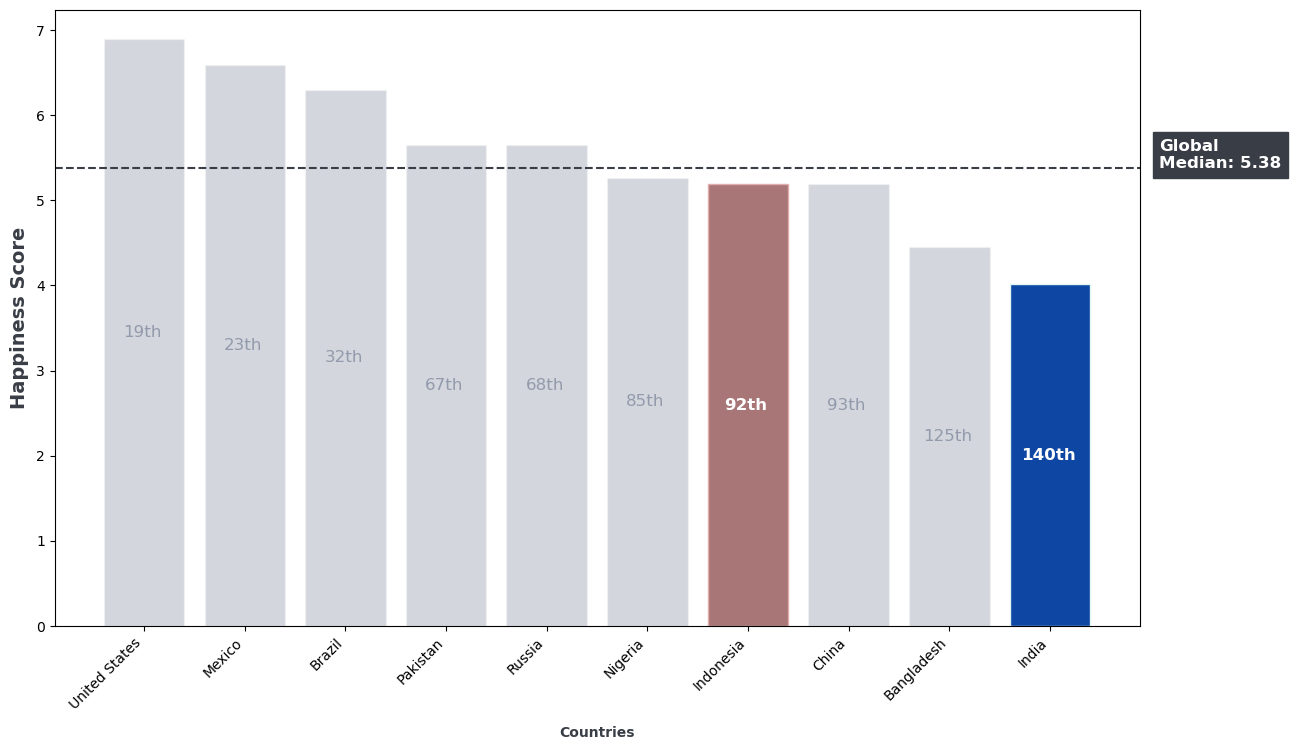

In [38]:
# Menghitung skor kebahagiaan median dari df_2022
median_score = df_2019['Score'].median()

mostpopulated_idx = list(mostpopulated_df.index + 1)

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara dengan penduduk terbanyak
bars1 = ax.bar(mostpopulated_df['Country or region'], mostpopulated_df['Score'], color=colors_monokrom[3], alpha=0.4, edgecolor=colors_monokrom[0])

# Meningkatkan opaqueness bar Indonesia menjadi 1 (tak transparan)
bars1[6].set_alpha(1)
# Mengatur warna bar Korea dengan warna spesifik dari colors_mix
bars1[6].set_color(colors_pink[0])
# Mengatur warna tepi bar Korea
bars1[6].set_edgecolor(colors_pink[2])

# Meningkatkan opaqueness bar India menjadi 1 (tak transparan)
bars1[9].set_alpha(1)
# Mengatur warna bar Korea dengan warna spesifik dari colors_mix
bars1[9].set_color(colors_blue[1])
# Mengatur warna tepi bar Korea
bars1[9].set_edgecolor(colors_blue[3])

# Rotate x-axis labels
ax.set_xticklabels(mostpopulated_df['Country or region'], rotation=45, ha="right")

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=10, labelpad=10, fontweight='bold', color=colors_monokrom[2])

# Mengatur label sumbu y
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=5, fontweight='bold', color=colors_monokrom[2])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks untuk menunjukkan skor median kebahagiaan global pada plot
avgl = ax.text(
    s="Global\nMedian: {:.2f}".format(median_score),  # Teks yang menampilkan skor median global dengan dua desimal
    x=xmax*1.02,  # Mengatur posisi teks di sumbu x, sedikit di luar batas maksimum x dari plot
    y=median_score,  # Mengatur posisi teks di sumbu y sesuai dengan nilai median_score
    backgroundcolor=colors_monokrom[2],  # Warna latar belakang teks
    fontsize=12,  # Ukuran font teks
    fontweight='bold',  # Membuat font tebal
    color='white'  # Warna teks
)

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_monokrom[2])

# Melakukan iterasi pada setiap baris dalam 'bars1' (Most Populated countries bars)
for i, bar in enumerate(bars1):
    # Mendapatkan posisi x dari bar
    x = bar.get_x()
    # Mendapatkan tinggi dari bar (yaitu, nilai skor kebahagiaan)
    y = bar.get_height()

    # Jika indeks tidak sama dengan 7 atau 10 (kondisi khusus untuk bar tertentu, mungkin Indonesia)
    if i not in [6,9]:
        # Menambahkan teks pada posisi tertentu di atas bar
        ax.text(
            s=f"{mostpopulated_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color=colors_monokrom[3],  # Warna teks
            fontsize=12,  # Ukuran font teks
        )
    else:
        # Untuk bar dengan indeks 7 atau 10, menggunakan format teks yang berbeda
        ax.text(
            s=f"{mostpopulated_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color='white',  # Warna teks
            fontsize=12,  # Ukuran font teks
            fontweight='bold'  # Membuat font tebal
        )

# Menampilkan plot
plt.show()

In [52]:
mostpopulated_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
31,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086
66,67,Pakistan,5.653,0.677,0.886,0.535,0.313,0.220,0.098
67,68,Russia,5.648,1.183,1.452,0.726,0.334,0.082,0.031
84,85,Nigeria,5.265,0.696,1.111,0.245,0.426,0.215,0.041
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
92,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.100
124,125,Bangladesh,4.456,0.562,0.928,0.723,0.527,0.166,0.143
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085


In [53]:
mostpopulated_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [56]:
# Filter rows for Indonesia and India
countries = ['Indonesia', 'India']
df_plot = mostpopulated_df[mostpopulated_df['Country or region'].isin(countries)]
for i , r in df_plot.iterrows():
  print(r)

Overall rank                           92
Country or region               Indonesia
Score                               5.192
GDP per capita                      0.931
Social support                      1.203
Healthy life expectancy              0.66
Freedom to make life choices        0.491
Generosity                          0.498
Perceptions of corruption           0.028
Name: 91, dtype: object
Overall rank                      140
Country or region               India
Score                           4.015
GDP per capita                  0.755
Social support                  0.765
Healthy life expectancy         0.588
Freedom to make life choices    0.498
Generosity                        0.2
Perceptions of corruption       0.085
Name: 139, dtype: object


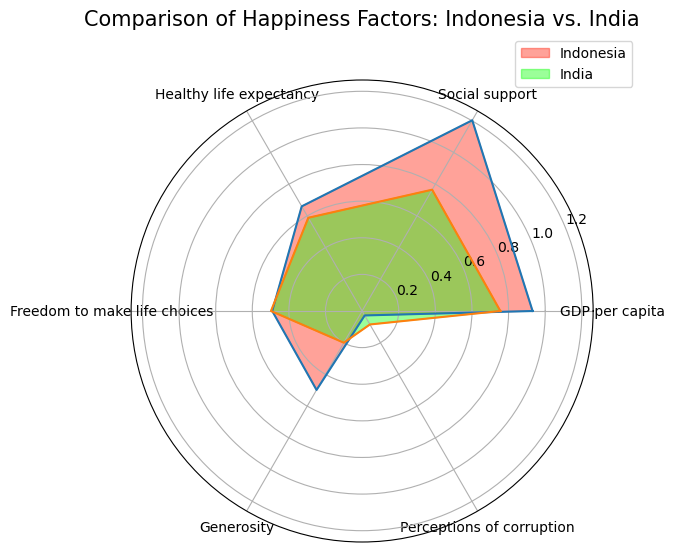

In [43]:
# Filter rows for Indonesia and India
countries = ['Indonesia', 'India']
df_plot = mostpopulated_df[mostpopulated_df['Country or region'].isin(countries)]

# Columns to include in the radar chart
columns = ['GDP per capita', 'Social support',
           'Healthy life expectancy', 'Freedom to make life choices',
           'Generosity','Perceptions of corruption']

# Number of variables we're plotting.
num_vars = len(columns)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop by appending the first angle at the end.

# Draw the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for k, (idx, row) in enumerate(df_plot.iterrows()):
    data = row[columns].tolist() + row[columns].tolist()[:1]  # Complete the loop
    ax.fill(angles, data, alpha=0.4, label=row['Country or region'], color=colors_neon[3*k], edgecolor=colors_neon[3*k])
    ax.plot(angles, data)

# Labels for each point
ax.set_xticks(angles[:-1])
col_name = ['GDP per capita', 'Social support',
           'Healthy life expectancy', 'Freedom to make life choices',
           'Generosity','Perceptions of corruption']
ax.set_xticklabels(col_name)

# Title and legend
plt.title('Comparison of Happiness Factors: Indonesia vs. India', size=15, color=colors_black[0], y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()